# Menggunakan Library Tensorflow

In [94]:
import tensorflow as tf ##jika error,  install tensorflow terlebih dahulu
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
import random

seed_value = 42
tf.random.set_seed(seed_value) 
np.random.seed(seed_value)      
random.seed(seed_value)  

In [95]:
fashion_mnist = tf.keras.datasets.fashion_mnist
                                                 
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [96]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [97]:
train_images.shape

(60000, 28, 28)

In [98]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [99]:
test_images.shape

(10000, 28, 28)

In [100]:
len(test_labels)

10000

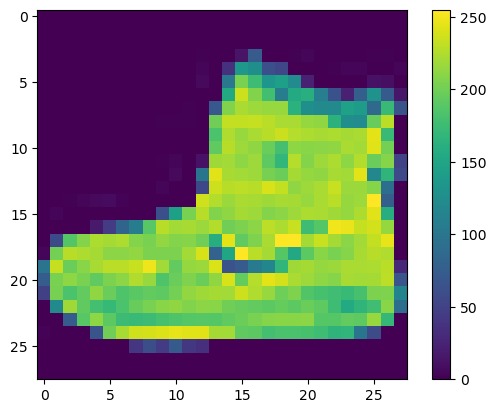

In [101]:
plt.figure() 
plt.imshow(train_images[0]) 
plt.colorbar() 
plt.grid(False)
plt.show() 

In [102]:
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255

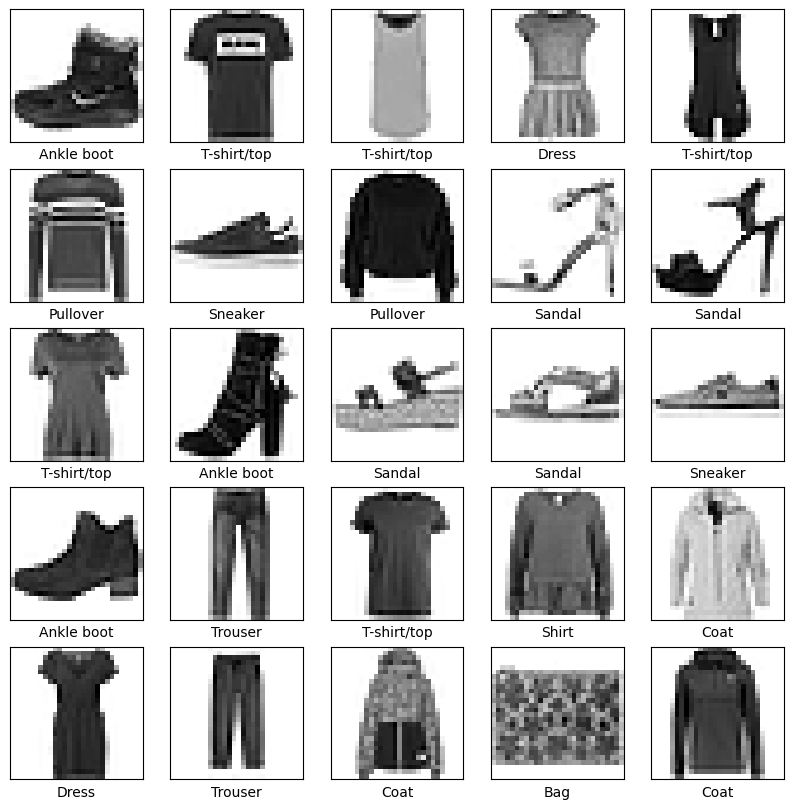

In [103]:
plt.figure(figsize=(10,10)) 
for i in range(25): 
    plt.subplot(5,5,i+1) 
    plt.xticks([]) 
    plt.yticks([]) 
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary) 
    plt.xlabel(class_names[train_labels[i]]) 
plt.show()

In [104]:
model_tf = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10)
])

In [105]:
model_tf.compile(optimizer='adam',
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])  

In [106]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    min_delta=0.0001,
    restore_best_weights=True
)

history = model_tf.fit(
    train_images, train_labels,
    epochs=40,
    validation_data=(test_images, test_labels),
    callbacks=[early_stopping]
)

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7315 - loss: 0.7442 - val_accuracy: 0.8441 - val_loss: 0.4242
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8383 - loss: 0.4489 - val_accuracy: 0.8545 - val_loss: 0.3966
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8509 - loss: 0.4068 - val_accuracy: 0.8608 - val_loss: 0.3802
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8574 - loss: 0.3907 - val_accuracy: 0.8673 - val_loss: 0.3687
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8635 - loss: 0.3724 - val_accuracy: 0.8687 - val_loss: 0.3611
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8684 - loss: 0.3578 - val_accuracy: 0.8700 - val_loss: 0.3573
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8705 - loss: 0.3544 - val_accuracy: 0.8741 - val_loss: 0.3484
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8727 - loss: 0.3469 - 

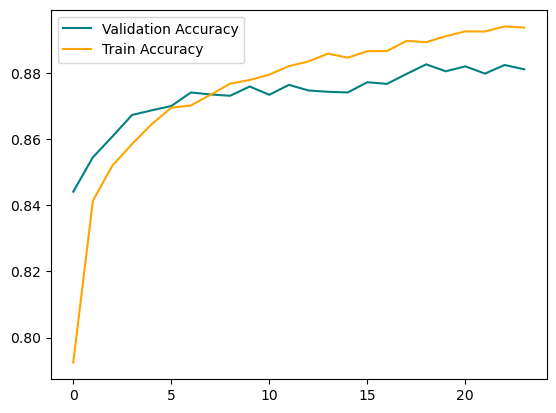

In [107]:
fig = plt.figure()
plt.plot(history.history['val_accuracy'], color='teal', label='Validation Accuracy')
plt.plot(history.history['accuracy'], color='orange', label='Train Accuracy')
plt.legend(loc='upper left')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

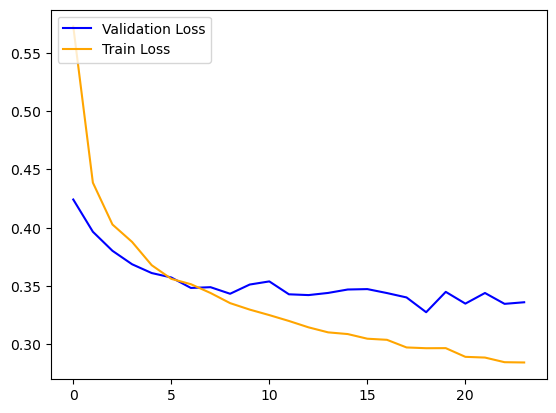

In [108]:
fig = plt.figure()
plt.plot(history.history['val_loss'], color = 'blue', label = 'Validation Loss')
plt.plot(history.history['loss'], color = 'orange', label = 'Train Loss')
plt.legend(loc="upper left")
plt.show

In [109]:
test_loss, test_acc_tf = model_tf.evaluate(test_images, test_labels, verbose=2) 
                                                                                
print('\nTest accuracy:', test_acc_tf) 

313/313 - 0s - 1ms/step - accuracy: 0.8826 - loss: 0.3275

Test accuracy: 0.8826000094413757


In [110]:
probability_model = tf.keras.Sequential([model_tf, 
                                         tf.keras.layers.Softmax()])

In [111]:
predictions_tf = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [112]:
predictions_tf[0]

array([2.0683486e-07, 2.3441070e-08, 1.1679006e-07, 1.4710794e-08,
       1.5451231e-07, 3.2621378e-03, 3.0379772e-07, 9.7031649e-03,
       3.5984647e-07, 9.8703361e-01], dtype=float32)

In [113]:
np.argmax(predictions_tf[0])

9

In [114]:
test_labels[0]

9

In [115]:
def plot_image(i, predictions_array, true_label, img):  
                                                        
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]), color=color)

def plot_value_array(i, predictions_array, true_label): 
                                                       
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

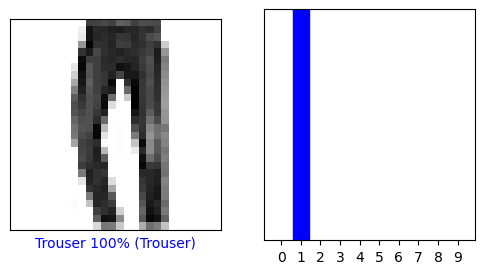

In [116]:
i = 5 
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_tf[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions_tf[i], test_labels)
plt.show()

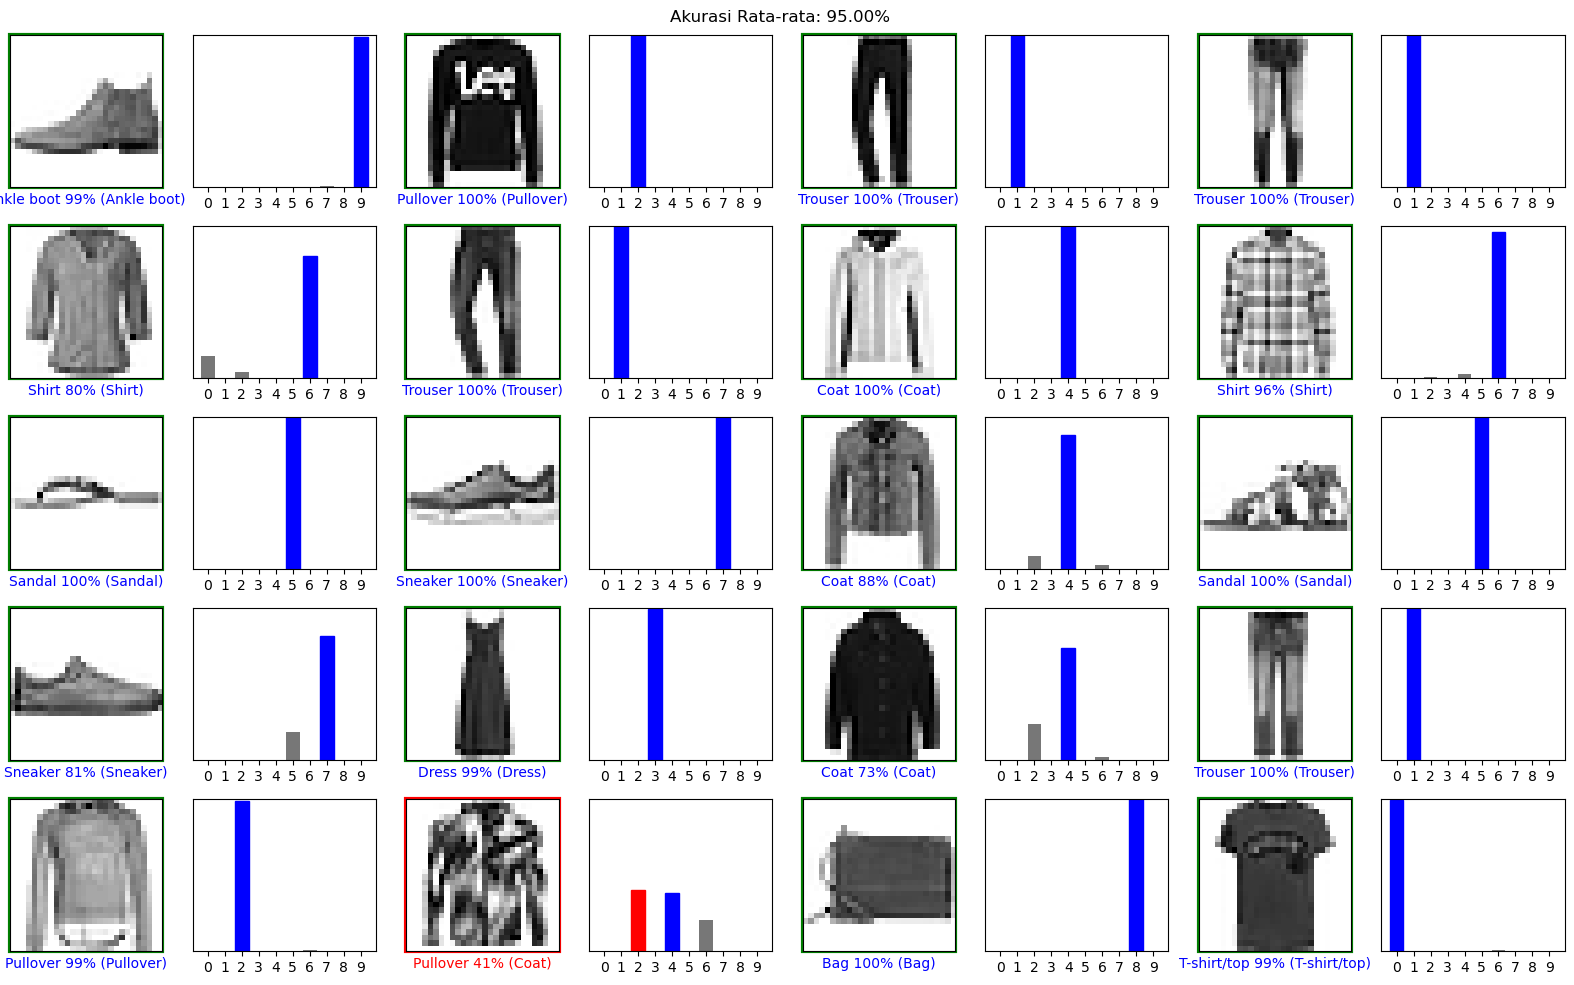

In [117]:
import numpy as np
import matplotlib.pyplot as plt

num_rows = 5
num_cols = 4
num_images = num_rows * num_cols

correct_predictions = [np.argmax(predictions_tf[i]) == test_labels[i] for i in range(num_images)]
average_accuracy = np.mean(correct_predictions) * 100  

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions_tf[i], test_labels, test_images)
    border_color = 'green' if correct_predictions[i] else 'red'
    plt.gca().patch.set_edgecolor(border_color)
    plt.gca().patch.set_linewidth(3)
    
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions_tf[i], test_labels)

plt.suptitle(f'Akurasi Rata-rata: {average_accuracy:.2f}%')
plt.tight_layout()
plt.show()

In [118]:
img = test_images[1] 

print(img.shape)

(28, 28, 1)


In [119]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28, 1)


In [120]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[1.9931425e-04 2.4238521e-13 9.9681997e-01 2.2356735e-08 4.6172753e-04
  4.1765580e-19 2.5190182e-03 5.6723979e-21 1.5659167e-11 3.7146804e-18]]


In [121]:
predictions_single = probability_model.predict(img) 
print(predictions_single) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[1.9931425e-04 2.4238521e-13 9.9681997e-01 2.2356735e-08 4.6172753e-04
  4.1765580e-19 2.5190182e-03 5.6723979e-21 1.5659167e-11 3.7146804e-18]]


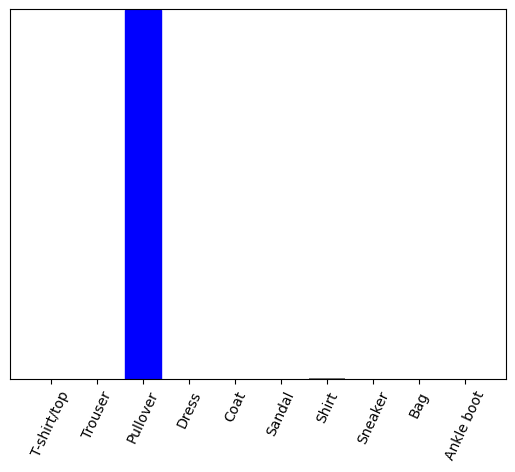

In [122]:
plot_value_array(1, predictions_single[0], test_labels) 
_ = plt.xticks(range(10),class_names, rotation=65) 
plt.show()

In [123]:
np.argmax(predictions_single[0]) 

2

In [124]:
df_test = pd.DataFrame({
    'Target': test_labels,  
    'Predicted': np.argmax(predictions_tf, axis=1),  
    'Proba_0': predictions_tf[:, 0],  
    'Proba_1': predictions_tf[:, 1]  
})

pixels = test_images.reshape(len(test_images), -1)

df_pixels = pd.DataFrame(pixels, columns=[f'pixel{i+1}' for i in range(28*28)])

df_test = pd.concat([df_test, df_pixels], axis=1)

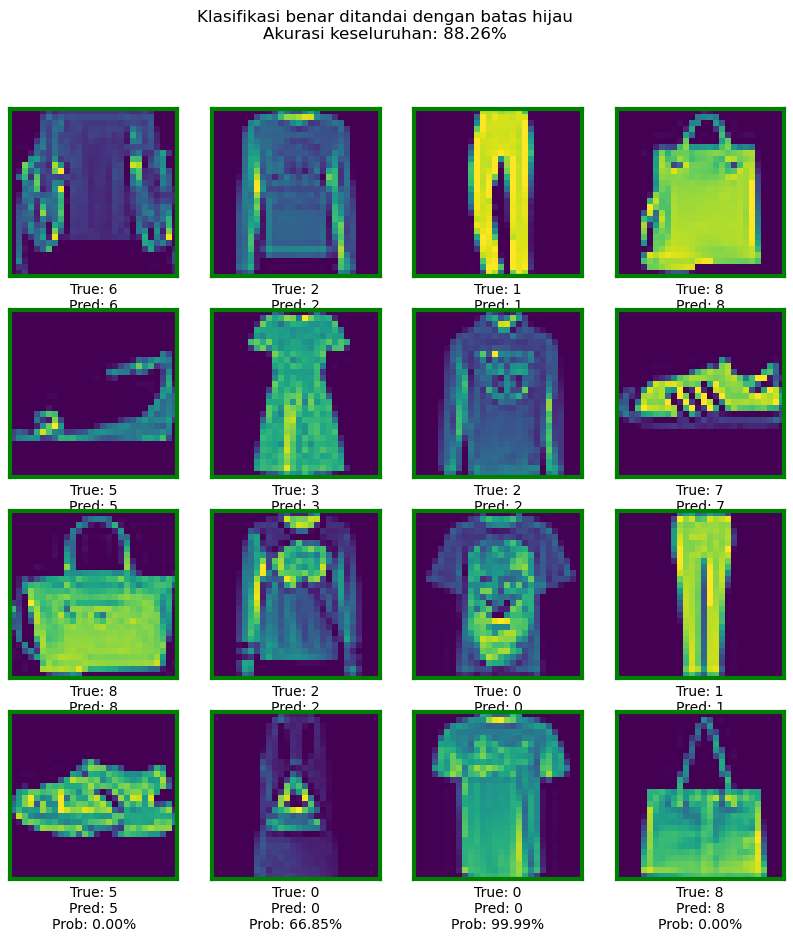

In [125]:
df_plot = df_test.sample(16, random_state=71).copy() 
fig, ax = plt.subplots(4, 4, figsize=(10, 10))

rata2_accuracy = (df_test['Target'] == df_test['Predicted']).mean() * 100

for i, axi in enumerate(ax.flat):
    p0 = df_plot['Proba_0'].values[i]
    p1 = df_plot['Proba_1'].values[i]

    predicted_class = df_plot['Predicted'].values[i]
    prediction_probability = max(p0, p1) * 100

    true_class = df_plot['Target'].values[i]

    pixels = df_plot[[f'pixel{j}' for j in range(1, 28 * 28 + 1)]].values[i].reshape(28, 28)
    axi.imshow(pixels, cmap='viridis')

    axi.set(
        xticks=[],
        yticks=[],
        xlabel=f"True: {true_class}\nPred: {predicted_class}\nProb: {prediction_probability:.2f}%"
    )

    edge_color = 'green' if predicted_class == true_class else 'red'
    axi.spines[:].set_edgecolor(edge_color)
    axi.spines[:].set_linewidth(3)

fig.suptitle(
    f"Klasifikasi benar ditandai dengan batas hijau\nAkurasi keseluruhan: {rata2_accuracy:.2f}%"
)
plt.show()


# Menggunakan Library Scikit-Learn

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf

In [127]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [128]:
from sklearn.datasets import fetch_openml
fashion_mnist = fetch_openml('Fashion-MNIST', version=1)

train_images = fashion_mnist.data[:60000]
train_labels = fashion_mnist.target[:60000].astype(int)
test_images = fashion_mnist.data[60000:]
test_labels = fashion_mnist.target[60000:].astype(int)

In [129]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [130]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import make_scorer, log_loss
import numpy as np

train_images_split, val_images, train_labels_split, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

model_sklearn = MLPClassifier(
    hidden_layer_sizes=(128, 300),
    activation='relu',
    alpha=0.0001,
    learning_rate_init=0.001,
    early_stopping=True,
    validation_fraction=0.2,
    n_iter_no_change=10,
    random_state=42,
    verbose=True
)

model_sklearn.fit(train_images_split, train_labels_split)
training_loss = model_sklearn.loss_curve_


Iteration 1, loss = 0.63552317
Validation score: 0.827292
Iteration 2, loss = 0.42263619
Validation score: 0.847500
Iteration 3, loss = 0.37126728
Validation score: 0.857604
Iteration 4, loss = 0.34177076
Validation score: 0.873958
Iteration 5, loss = 0.32000136
Validation score: 0.878750
Iteration 6, loss = 0.30229847
Validation score: 0.878125
Iteration 7, loss = 0.28603573
Validation score: 0.884687
Iteration 8, loss = 0.27602505
Validation score: 0.890521
Iteration 9, loss = 0.26272598
Validation score: 0.882396
Iteration 10, loss = 0.25466473
Validation score: 0.890521
Iteration 11, loss = 0.24281892
Validation score: 0.891250
Iteration 12, loss = 0.23238843
Validation score: 0.886771
Iteration 13, loss = 0.22470763
Validation score: 0.888958
Iteration 14, loss = 0.21646515
Validation score: 0.892708
Iteration 15, loss = 0.21138910
Validation score: 0.882812
Iteration 16, loss = 0.20453345
Validation score: 0.893646
Iteration 17, loss = 0.19352105
Validation score: 0.891250
Iterat

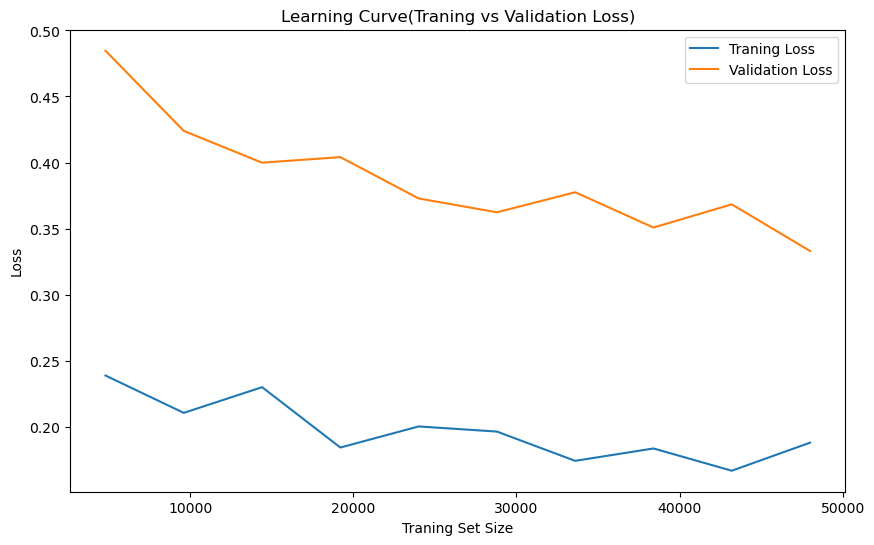

In [132]:

from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    model_sklearn,train_images,train_labels, train_sizes=np.linspace(0.1, 1.0, 10), cv=5,
    scoring='neg_log_loss', random_state=71,  n_jobs=-1)

train_loss_mean = -train_scores.mean(axis=1)
val_loss_mean = -val_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_loss_mean, label='Traning Loss')
plt.plot(train_sizes, val_loss_mean, label='Validation Loss')
plt.xlabel('Traning Set Size')
plt.ylabel('Loss')
plt.title('Learning Curve(Traning vs Validation Loss)')
plt.legend()
plt.show()


In [133]:
test_predictions = model_sklearn.predict(test_images)
test_acc_sklearn = accuracy_score(test_labels, test_predictions)
print('\nTest accuracy:', test_acc_sklearn)


Test accuracy: 0.8871


In [134]:
print("\nClassification Report:\n", classification_report(test_labels, test_predictions))

predictions_proba = model_sklearn.predict_proba(test_images)


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.79      0.81      0.80      1000
           3       0.86      0.92      0.89      1000
           4       0.80      0.82      0.81      1000
           5       0.97      0.96      0.97      1000
           6       0.72      0.70      0.71      1000
           7       0.93      0.97      0.95      1000
           8       0.98      0.96      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [135]:
predictions_sklearn = model_sklearn.predict_proba(test_images)
print(predictions_sklearn[0])  
print("Predicted label for first image:", np.argmax(predictions_sklearn[0]))  

print("Actual label for first image:", test_labels.iloc[0])  

[7.27031047e-11 1.58230648e-09 1.72957327e-08 5.06668988e-08
 1.61048229e-08 8.06031557e-07 1.87509016e-10 1.45934980e-04
 2.80917451e-11 9.99853173e-01]
Predicted label for first image: 9
Actual label for first image: 9


In [136]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label.iloc[i], img.iloc[i].values.reshape(28, 28)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = "blue" if predicted_label == true_label else "red"

    plt.xlabel(
        f"{class_names[predicted_label]} {100*np.max(predictions_array):.2f}% ({class_names[true_label]})",
        color=color
    )

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label.iloc[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])

    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")


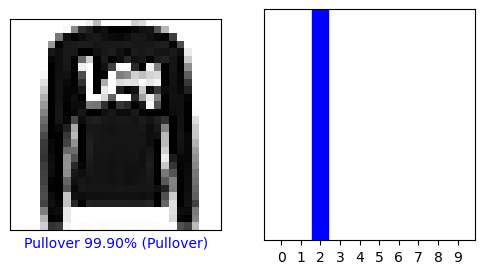

In [137]:
i = 1
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions_sklearn[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions_sklearn[i], test_labels)
plt.show()

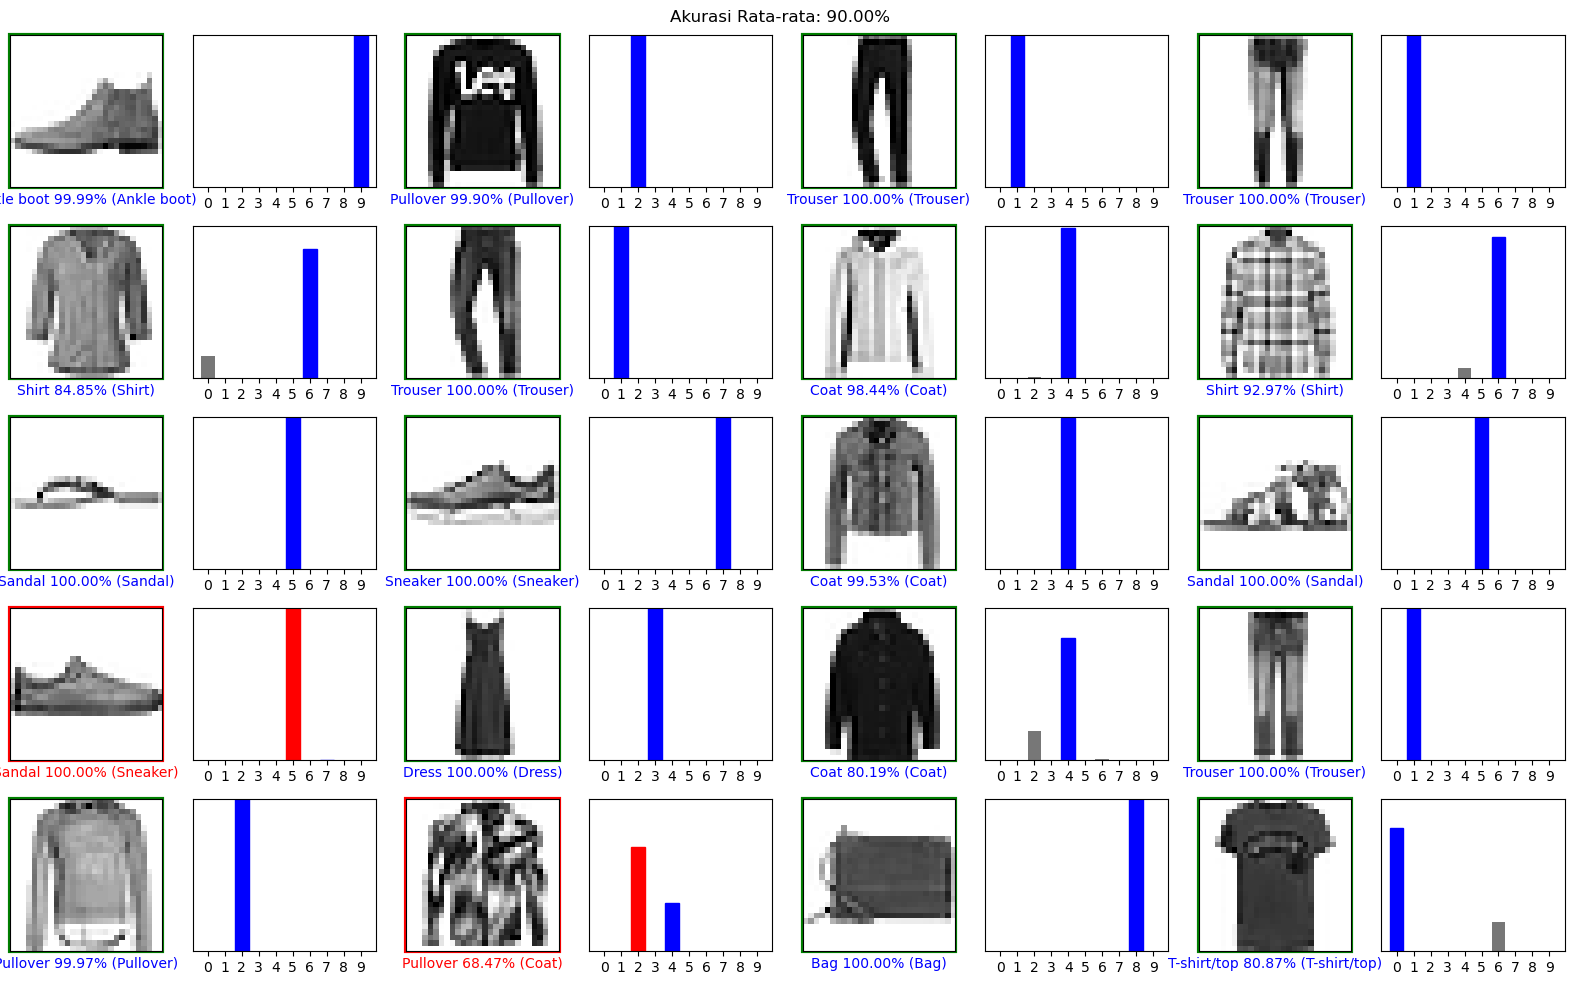

In [139]:
import numpy as np
import matplotlib.pyplot as plt

num_rows = 5
num_cols = 4
num_images = num_rows * num_cols

correct_predictions = [np.argmax(predictions_sklearn[i]) == test_labels.iloc[i] for i in range(num_images)]
average_accuracy = np.mean(correct_predictions) * 100

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions_sklearn[i], test_labels, test_images)
    border_color = 'green' if correct_predictions[i] else 'red'
    plt.gca().patch.set_edgecolor(border_color)
    plt.gca().patch.set_linewidth(3)

    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions_sklearn[i], test_labels)

plt.suptitle(f"Akurasi Rata-rata: {average_accuracy:.2f}%")
plt.tight_layout()
plt.show()


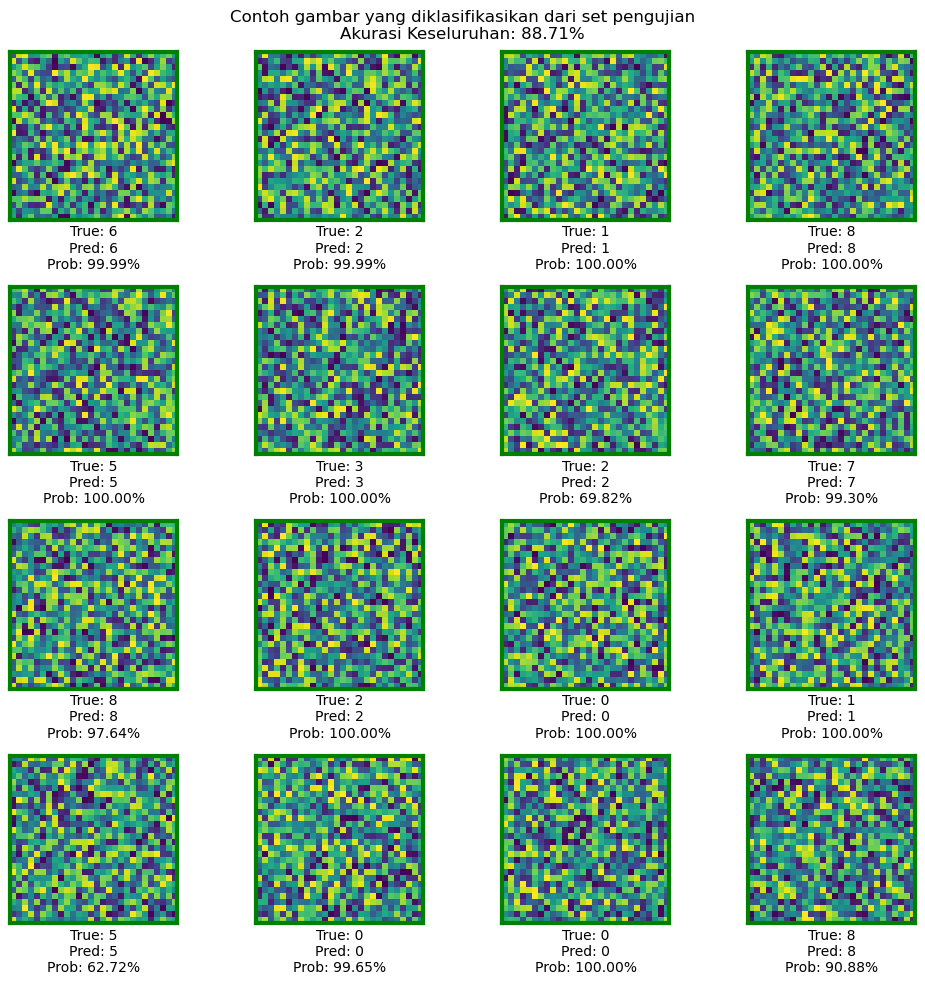

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n_samples = 10000

df_test = pd.DataFrame({
    'Target': test_labels,
    'Predicted': np.argmax(predictions_sklearn, axis=1),
    'Proba_0': predictions_sklearn[:, 0],
    'Proba_1': predictions_sklearn[:, 1]
})

df_test['Proba_0'] = df_test['Proba_0'] / (df_test['Proba_0'] + df_test['Proba_1'])
df_test['Proba_1'] = 1 - df_test['Proba_0']

for i in range(1, 28 * 28 + 1):
    df_test[f'pixel{i}'] = np.random.randint(0, 256, n_samples)

df_plot = df_test.sample(16, random_state=71).copy()

fig, ax = plt.subplots(4, 4, figsize=(10, 10))
rata2_accuracy = (df_test['Target'] == df_test['Predicted']).mean() * 100

for i, axi in enumerate(ax.flat):
    p0 = df_plot['Proba_0'].values[i]
    p1 = df_plot['Proba_1'].values[i]
    predicted_class = df_plot['Predicted'].values[i]
    prediction_probability = max(p0, p1) * 100
    true_class = df_plot['Target'].values[i]
    pixels = df_plot[[f'pixel{j}' for j in range(1, 28 * 28 + 1)]].values[i].reshape(28, 28)

    axi.imshow(pixels, cmap='viridis')
    axi.set(
        xticks=[], yticks=[],
        xlabel=f"True: {true_class}\nPred: {predicted_class}\nProb: {prediction_probability:.2f}%"
    )

    edge_color = 'green' if predicted_class == true_class else 'red'
    for spine in axi.spines.values():
        spine.set_edgecolor(edge_color)
        spine.set_linewidth(3)

fig.suptitle(f"Contoh gambar yang diklasifikasikan dari set pengujian\nAkurasi Keseluruhan: {rata2_accuracy:.2f}%")
plt.tight_layout()
plt.show()

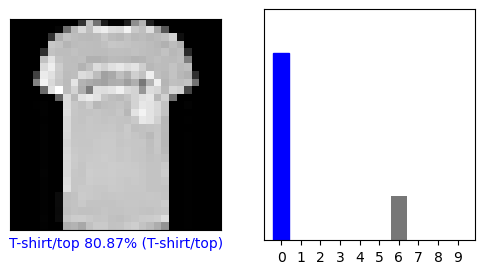

In [141]:
import numpy as np
import matplotlib.pyplot as plt

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label.iloc[i], img.iloc[i].values.reshape(28, 28)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(
        f"{class_names[predicted_label]} {100 * np.max(predictions_array):.2f}% ({class_names[true_label]})",
        color=color
    )

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label.iloc[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])

    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

i = 19
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plot_image(i, predictions_sklearn[i], test_labels, test_images)

plt.subplot(1, 2, 2)
plot_value_array(i, predictions_sklearn[i], test_labels)

plt.show()


In [142]:
import numpy as np
import matplotlib.pyplot as plt

def save_image_only(i, true_label, img):
    img = img.iloc[i].values.reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.savefig(f"image_only_{i}.jpeg", bbox_inches='tight', pad_inches=0)
    plt.close()

i = 19
save_image_only(i, test_labels, test_images)

In [143]:
import pandas as pd

data = {
    'Model': ['TensorFlow', 'Scikit-Learn'],
    'Accuracy': [test_acc_tf, test_acc_sklearn],
    'Architecture': ['Neural Network (2 hidden layers)', 'MLP (2 hidden layers)'],
    'Early Stopping': ['Yes', 'Yes']
}

comparison_df = pd.DataFrame(data)

best_model = comparison_df.loc[comparison_df['Accuracy'].idxmax()]

print("Comparison of Model Performance:")
print(comparison_df)

print("\nBest Model Based on Accuracy:")
print(best_model)


Comparison of Model Performance:
          Model  Accuracy                      Architecture Early Stopping
0    TensorFlow    0.8826  Neural Network (2 hidden layers)            Yes
1  Scikit-Learn    0.8871             MLP (2 hidden layers)            Yes

Best Model Based on Accuracy:
Model                      Scikit-Learn
Accuracy                         0.8871
Architecture      MLP (2 hidden layers)
Early Stopping                      Yes
Name: 1, dtype: object


In [145]:
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(model_sklearn, file)